# Problem Statement
<img align="left" src="./images/C1_W1_L3_S1_trainingdata.png"    style=" width:380px; padding: 10px;  " />

As in the lecture, you will use the motivating example of housing price prediction.  
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.


# **Step 01**
- Import Necessary Libraries for this Lab 01

In [241]:
import numpy as np
import matplotlib.pyplot as plt

# **Step 02**
 - Create your x_train and y_train variables.The data is stored in one-dimensional NumPy arrays.

In [244]:
size = [1.0, 2.0]
price = [300., 500.]
x_train = np.array(size)
y_train = np.array(price)
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")

x_train: [1. 2.]
y_train: [300. 500.]


### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [247]:
m = x_train.shape[0]
print(f"x_train.shape: {m}")

x_train.shape: 2


One can also use the Python `len()` function as shown below.

In [250]:
m = len(x_train)
print(f"x_train.shape: {m}")

x_train.shape: 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [253]:
print(f"(x^(0), y^(0) = {x_train[0],y_train[0]}")
print(f"(x^(1), y^(1) = {x_train[1],y_train[1]}")

(x^(0), y^(0) = (1.0, 300.0)
(x^(1), y^(1) = (2.0, 500.0)


**Using Loop**

In [256]:
for i in range(m):
    print(f"(x^({i}), y^({i}) = {x_train[i], y_train[i]}")

(x^(0), y^(0) = (1.0, 300.0)
(x^(1), y^(1) = (2.0, 500.0)


You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below.
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

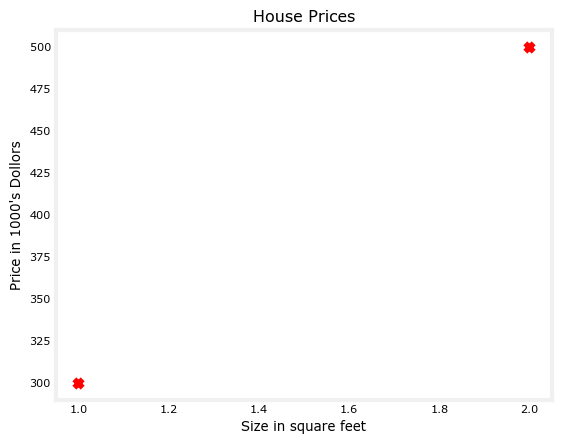

In [259]:
plt.scatter(x_train, y_train, marker = "x", color = "r")
plt.title("House Prices")
plt.xlabel("Size in square feet")
plt.ylabel("Price in 1000's Dollors")
plt.show()

**Alternative way of above plot**

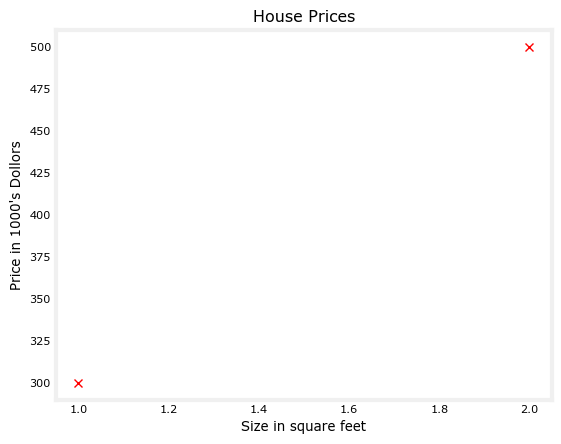

In [262]:
plt.plot(x_train, y_train, "xr")
plt.title("House Prices")
plt.xlabel("Size in square feet")
plt.ylabel("Price in 1000's Dollors")
plt.show()

## Model function

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " > As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$.

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [265]:
w = 100
b = 100
print(f"w: {w}, b: {b}")

w: 100, b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as -

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [268]:
def compute_model_output(x, w, b):
    m = len(x)
    f_wb = np.zeros(m)
    for i in range(0,m):
        f_wb[i] = w * x[i] + b
    return f_wb

**Alternative way**

In [271]:
def compute_model_output(x, w, b):
    f_wb = w * x + b
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

Model output: [200. 300.]



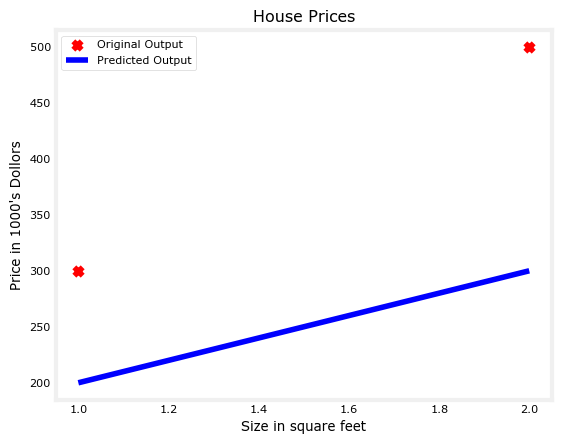

In [274]:
temp_f_wb = compute_model_output(x_train, w, b)
print(f"Model output: {temp_f_wb}\n")

plt.scatter(x_train, y_train, marker = "x", color = "r", label = "Original Output")
plt.plot(x_train, temp_f_wb, c = "b", label = "Predicted Output")
plt.title("House Prices")
plt.xlabel("Size in square feet")
plt.ylabel("Price in 1000's Dollors")
plt.legend()
plt.show()

As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data.

### Challenge
Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

#### Tip:
You can use your mouse to click on the triangle to the left of the green "Hints" below to reveal some hints for choosing b and w.

<details>
<summary>
    <font size='3', color='darkgreen'><b>Hints</b></font>
</summary>
    <p>
    <ul>
        <li>Try $w = 200$ and $b = 100$ </li>
    </ul>
    </p>

Model output: [300. 500.]



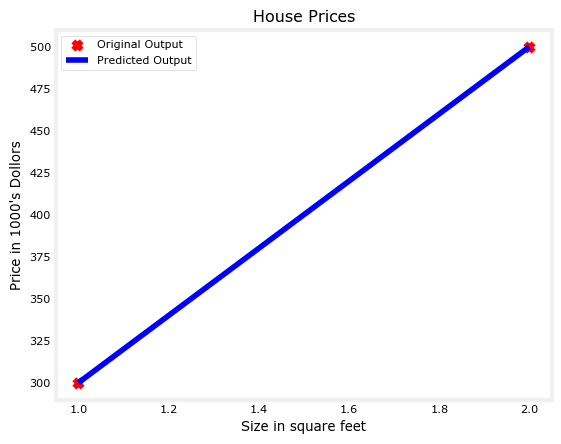

In [278]:
w = 200
b = 100
temp_f_wb = compute_model_output(x_train, w, b)
print(f"Model output: {temp_f_wb}\n")

plt.scatter(x_train, y_train, marker = "x", color = "r", label = "Original Output")
plt.plot(x_train, temp_f_wb, c = "b", label = "Predicted Output")
plt.title("House Prices")
plt.xlabel("Size in square feet")
plt.ylabel("Price in 1000's Dollors")
plt.legend()
plt.show()

### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [281]:
x = 1.2
pred = compute_model_output(x, w, b)
print(f"${pred} thousands dollars")

$340.0 thousands dollars


# Congratulations!
In this lab you have learned:
 - Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was house size and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.

# Optional  Lab: Cost Function
<figure>
    <center> <img src="./images/C1_W1_L3_S2_Lecture_b.png"  style="width:1000px;height:200px;" ></center>
</figure>


## Tools

- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data


In [286]:
import numpy as np
import matplotlib.pyplot as plt

## Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [289]:
def compute_model_output(x, w, b):
    f_wb = w * x + b
    return f_wb

x = 1.5
pred = compute_model_output(x, w, b)
print(f"${pred} thousands dollars")

$400.0 thousands dollars


## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [293]:
def compute_cost(x, y, w, b, m):
    m = len(x)
    cost = 0
    for i in range(0,m):
        loss = (compute_model_output(x[i], w, b) - y[i] ) ** 2 / 2 * m
        cost += loss
    return cost

In [295]:
msse = compute_cost(x_train, y_train, w, b, m)
print(f"Cost Rate: {int(msse)}")

Cost Rate: 0


<img align="left" src="./images/C1_W1_Lab02_GoalOfRegression.PNG"    style=" width:380px; padding: 10px;  " /> Your goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

In the previous lab, you determined that $b=100$ provided an optimal solution so let's set $b$ to 100 and focus on $w$.
<br/>

Below, use the slider control to select the value of $w$ that minimizes cost. It can take a few seconds for the plot to update.

In [298]:
from lab_utils_uni import plt_intuition, plt_contour_wgrad, plt_gradients, plt_divergence, plt_house_x

In [300]:
plt_intuition(x_train, y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

The plot contains a few points that are worth mentioning.
- cost is minimized when $w = 200$, which matches results from the previous lab
- Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when $w$ is either too large or too small.
- Using the `w` and `b` selected by minimizing cost results in a line which is a perfect fit to the data.

## Cost Function Visualization- 3D

You can see how cost varies with respect to *both* `w` and `b` by plotting in 3D or using a contour plot.   
It is worth noting that some of the plotting in this course can become quite involved. The plotting routines are provided and while it can be instructive to read through the code to become familiar with the methods, it is not needed to complete the course successfully. The routines are in lab_utils_uni.py in the local directory.

### Larger Data Set
It's use instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line. What does that mean for the cost equation? Can we find $w$, and $b$ that will give us a cost of 0?

In [305]:
import lab_utils_common
import lab_utils_uni

In the contour plot, click on a point to select `w` and `b` to achieve the lowest cost. Use the contours to guide your selections. Note, it can take a few seconds to update the graph.

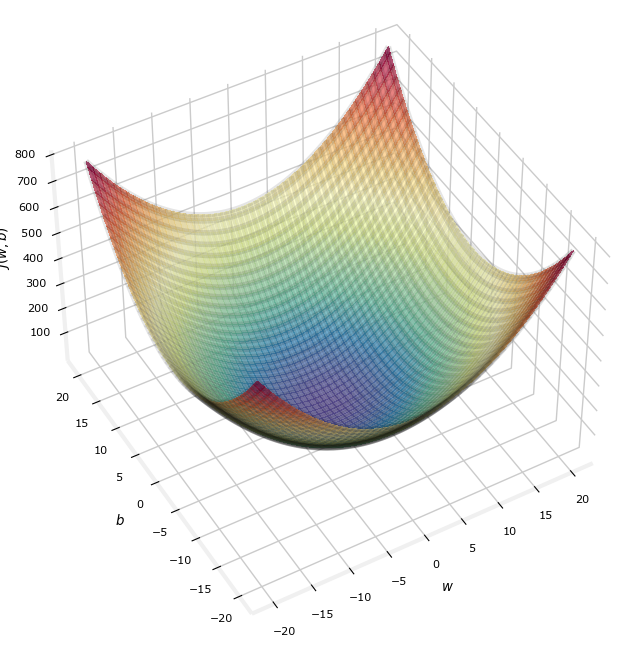

In [308]:
soup_bowl()

Above, note the dashed lines in the left plot. These represent the portion of the cost contributed by each example in your training set. In this case, values of approximately $w=209$ and $b=2.4$ provide low cost. Note that, because our training examples are not on a line, the minimum cost is not zero.

### Convex Cost surface
The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the $w$ and $b$ dimensions scale differently, this is not easy to recognize. The following plot, where $w$ and $b$ are symmetric, was shown in lecture:

# Congratulations!
You have learned the following:
 - The cost equation provides a measure of how well your predictions match your training data.
 - Minimizing the cost can provide optimal values of $w$, $b$.

# Optional Lab: Gradient Descent for Linear Regression

<figure>
    <center> <img src="./images/C1_W1_L4_S1_Lecture_GD.png"  style="width:800px;height:200px;" ></center>
</figure>

<a name="toc_40291_2"></a>
# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


In [316]:
def compute_model_output(x, w, b):
    f_wb = w * x + b
    return f_wb

x = 1.2
pred = compute_model_output(x, w, b)
print(f"${pred} thousands dollars")

$340.0 thousands dollars


In [318]:
def compute_cost(x, y, w, b):
    m = len(x)
    cost = 0
    for i in range(0,m):
        loss = (compute_model_output(x[i], w, b) - y[i] ) ** 2 / 2 * m
        cost += loss
    return cost

msse = compute_cost(x_train, y_train, w, b)
print(f"Cost Rate: {int(msse)}")

Cost Rate: 0


<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions.
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [323]:
def compute_gradient(x, y, w, b):
    m = len(x_train)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = compute_model_output(x[i], w, b)
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_db = dj_db / m
    dj_dw = dj_dw / m
    return dj_dw, dj_db

In [325]:
dw, db = compute_gradient(x_train, y_train, 200, 100)
print(f"dw: {dw}, db: {db}")

dw: 0.0, db: 0.0


In [327]:
def gradient_descent(x, y, w, b, alpha, num_iters, compute_grad):
    for i in range(num_iters):
        w -= alpha*compute_grad[0]
        b -= alpha*compute_grad[1]
        return w, b

In [331]:
grad = gradient_descent(x_train, y_train, 200, 100, 0.1, 10, (dw, db))
print(f"Gradient Descent: {grad}")

Gradient Descent: (200.0, 100.0)


In [333]:
def gradient_descent(x, y, w, b, alpha, num_iters, compute_cost, compute_grad):
    J_history = []
    P_history = []
    for i in range(num_iters):
        dj_dw, dj_db  = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 10000:
            J_history.append(compute_cost(x, y, w, b))
            P_history.append([w,b])
        if i% math.ceil(num_iters/20) == 0:
            print(f"\t\t\t\t\t\t\titeration {i:4}\ncost: {J_history[-1]}",
            f"\tdj_dw: {dj_dw}, \t\tdj_db: {dj_db}",
            f"\tw: {w},\t b:{b}")
            print("========================================================================================================================================================")
    return w, b, J_history, P_history

In [335]:
import math
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, 
                                                    compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:.2f},{b_final:.2f})")

							iteration    0
cost: 317099.25 	dj_dw: -650.0, 		dj_db: -400.0 	w: 6.5,	 b:4.0
							iteration  500
cost: 28.318041243474948 	dj_dw: -0.534713385741469, 		dj_db: 0.8651455609634979 	w: 192.67562022511058,	 b:111.85108446847413
							iteration 1000
cost: 13.65004372766167 	dj_dw: -0.3712293911791278, 		dj_db: 0.6006617725498984 	w: 194.91482409389593,	 b:108.2279874548482
							iteration 1500
cost: 6.579681559419709 	dj_dw: -0.25773759366074955, 		dj_db: 0.4170281867215522 	w: 196.46945788096426,	 b:105.71253714731284
							iteration 2000
cost: 3.1715802738152705 	dj_dw: -0.17894237030935756, 		dj_db: 0.28953483718788675 	w: 197.5488109193384,	 b:103.96610724536305
							iteration 2500
cost: 1.5287854499360272 	dj_dw: -0.12423632671172413, 		dj_db: 0.2010185992568836 	w: 198.29818546087893,	 b:102.7535937668466
							iteration 3000
cost: 0.7369149604164072 	dj_dw: -0.0862549481608994, 		dj_db: 0.13956343782209046 	w: 198.81846212990547,	 b:101.91176843280807
							iteratio